# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("ticks")

# Import datasets

In [42]:
raw_train=pd.read_csv('train.csv')
raw_test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

### info

In [3]:
print(raw_train.info())
print(raw_test.info())
print(gender_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

# Preprocessing

## 1. column dropping

In [4]:
raw_train=raw_train.drop('Name',axis=1)
raw_train=raw_train.drop('Ticket',axis=1)
raw_train=raw_train.drop('PassengerId',axis=1)


raw_test=raw_test.drop('Name',axis=1)
raw_test=raw_test.drop('Ticket',axis=1)
raw_test=raw_test.drop('PassengerId',axis=1)

## 2. Missing values

#### Train data

In [5]:
print(raw_train.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [6]:
# in train data - Cabin and Embarked missing value
train1=raw_train.drop('Cabin',axis=1)
train1=train1.dropna(subset=['Embarked'])
print(train1.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


In [18]:
import math
female_mean, male_mean = train1.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

train1["Age"] = train1.apply(lambda row : fill_age(
    row["Age"],row["Sex"]),axis = 1)
train2=train1

### test data

In [19]:
print(raw_test.isnull().sum())

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [46]:
test1=raw_test.drop(["Cabin"],axis=1)
print(test1.isnull().sum())
test1.info()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [48]:
import math
female_mean, male_mean = test1.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

test1["Age"] = test1.apply(lambda row : fill_age(
    row["Age"],row["Sex"]),axis = 1)


In [51]:
test1["Fare"].fillna( 
    method ='ffill', inplace = True)
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## 3. Exploring PDFs

C:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


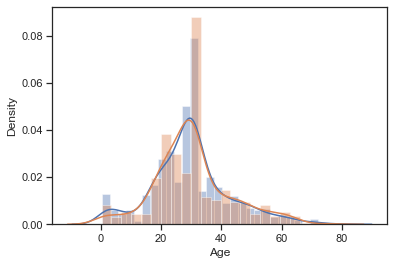

In [52]:
print(sns.distplot(train2['Age']))
print(sns.distplot(test1['Age']))

C:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

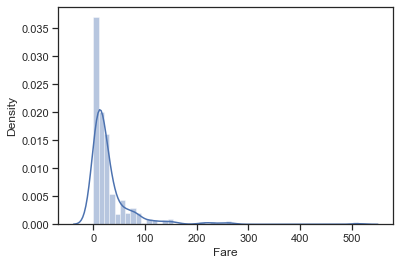

In [53]:
sns.distplot(train2['Fare'])
#sns.distplot(test1['Fare'])

In [54]:
q=train2['Fare'].quantile(0.98)
train3=train2[train2['Fare']<q]

### 4. Multicolinierity

In [55]:
train3.columns.values

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=train3[['Age','Pclass','SibSp','Parch','Fare']]
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif


,VIF,Features
0,4.727783,Age
1,3.921046,Pclass
2,1.650365,SibSp
3,1.547892,Parch
4,2.288892,Fare


## 5. Dummies

#### Train data

In [56]:

print(train3.columns.values)
#print(train3.info())
print(train3.Pclass.unique())
print(train3.Sex.unique())
print(train3.SibSp.unique())
print(train3.Parch.unique())
print(train3.Embarked.unique())
#print(train3.Fare.unique())


['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']
[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q']


In [57]:
cat=train3[['Pclass','SibSp','Parch'
           ]].astype('category')
train4=train3.drop(['Pclass','SibSp','Parch'
                   ],axis=1)
#
train4=pd.concat([train4,cat],axis=1, join='inner')

In [58]:
#train4=train4.merge(cat)
train4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  869 non-null    int64   
 1   Sex       869 non-null    object  
 2   Age       869 non-null    float64 
 3   Fare      869 non-null    float64 
 4   Embarked  869 non-null    object  
 5   Pclass    869 non-null    category
 6   SibSp     869 non-null    category
 7   Parch     869 non-null    category
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 44.1+ KB


### Test data

In [59]:

cat=test1[['Pclass','SibSp','Parch'
           ]].astype('category')
test2=test1.drop(['Pclass','SibSp','Parch'
                   ],axis=1)
#
test2=pd.concat([test2,cat],axis=1, join='inner')
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Name         418 non-null    object  
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   Ticket       418 non-null    object  
 5   Fare         418 non-null    float64 
 6   Embarked     418 non-null    object  
 7   Pclass       418 non-null    category
 8   SibSp        418 non-null    category
 9   Parch        418 non-null    category
dtypes: category(3), float64(2), int64(1), object(4)
memory usage: 25.0+ KB


In [60]:
train5=pd.get_dummies(train4)
test3=pd.get_dummies(test2)

## Target- validation- test split

In [61]:
test3.columns.values

array(['PassengerId', 'Age', 'Fare', 'Name_Abbott, Master. Eugene Joseph',
       'Name_Abelseth, Miss. Karen Marie',
       'Name_Abelseth, Mr. Olaus Jorgensen',
       'Name_Abrahamsson, Mr. Abraham August Johannes',
       'Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Name_Aks, Master. Philip Frank',
       'Name_Aldworth, Mr. Charles Augustus',
       'Name_Allison, Mr. Hudson Joshua Creighton',
       'Name_Andersen, Mr. Albert Karvin',
       'Name_Andersson, Miss. Ida Augusta Margareta',
       'Name_Andersson, Mr. Johan Samuel',
       'Name_Andrew, Mr. Frank Thomas', 'Name_Angheloff, Mr. Minko',
       'Name_Angle, Mr. William A', 'Name_Aronsson, Mr. Ernst Axel Algot',
       'Name_Ashby, Mr. John', 'Name_Asplund, Master. Carl Edgar',
       'Name_Asplund, Master. Filip Oscar',
       'Name_Asplund, Mr. Carl Oscar Vilhelm Gustafsson',
       'Name_Asplund, Mr. Johan Charles',
       'Name_Assaf Khalil, Mrs. Mariana (Miriam")"',
       'Name_Assaf, Mr. Gerios', 'Nam

In [62]:
x_cols=['Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6']
y_cols=['Survived']

train_inputs=train5[x_cols]
train_targets=train5[y_cols]

test_inputs=test3[x_cols]
#test_targets=test3[y_cols]


# Scale the data

In [63]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()

scaler.fit(train_inputs)
train_inputs_scaled=scaler.transform(train_inputs)

scaler.fit(test_inputs)
test_inputs_scaled=scaler.transform(test_inputs)
type(train_inputs_scaled)


numpy.ndarray

# Logistic Regression

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


## Training and validation

In [81]:
x_train, x_val, y_train, y_val=train_test_split(
    train_inputs_scaled,train_targets,test_size=0.2,random_state=365)

model.fit(x_train,y_train)
predict=model.predict(x_val)
print(y_val.shape)
predict.shape

(174, 1)


C:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(174,)

In [82]:
score=model.score(x_val,y_val)
print(score)

# Confusion Matrix

from sklearn import metrics
cm=metrics.confusion_matrix(y_val,predict)
print(cm)

0.8160919540229885
[[88 15]
 [17 54]]


## Testing

In [83]:

predict=model.predict(test_inputs_scaled)

predict.shape

(418,)

In [84]:
#gender_submission

In [85]:
gender_submission['Survived']=predict
gender_submission.to_csv('gender_submission.csv',index=False)
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
